In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple

import pandas as pd

import scipy as sp
#%matplotlib widget

In [2]:
tabla_indices = pd.read_excel('Indices_Refraccion copy.xlsx')
tabla_indices

,Temperatura,Vinagre,Alcohol,Agua
0,17.0,1.3375,1.3665,1.3345
1,17.5,1.3375,1.3660,1.3340
2,18.0,1.3375,1.3670,1.3345
3,18.5,1.3375,1.3650,1.3335
4,19.0,1.3370,1.3655,1.3335
5,19.5,1.3375,1.3645,1.3330
6,20.0,1.3375,1.3645,1.3330
7,20.5,1.3375,1.3640,1.3330
8,21.0,1.3375,1.3640,1.3330
9,21.5,1.3370,1.3635,1.3330


In [3]:
for material in tabla_indices.keys()[1:]:
	var_relativa = (
		tabla_indices[material].max() - tabla_indices[material].min()
	)/tabla_indices[material].mean()
	print('{}: {:.3%}'.format(material, var_relativa))

Vinagre: 0.075%
Alcohol: 0.403%
Agua: 0.150%


In [4]:
temperaturas = tabla_indices['Temperatura'].to_numpy()

regresiones = {
	material : sp.stats.linregress(temperaturas, tabla_indices[material])
	for material in tabla_indices.iloc[:, 1:]
}

regresiones_ecuaciones = {}
for material in regresiones.keys():
	regresion = lambda T: T*(regresiones[material].slope) + regresiones[material].intercept
	regresiones_ecuaciones[material] = regresion

In [5]:
regresiones['Agua'].slope, regresiones['Agua'].intercept

(np.float64(-0.00017402597402597044), np.float64(1.3368999999999998))

In [6]:
regresiones['Agua'].stderr, regresiones['Agua'].intercept_stderr

(np.float64(2.226410180345853e-05), np.float64(0.0004944268378554759))

In [7]:
regresiones_table = pd.DataFrame.from_dict(regresiones, orient='index')
regresiones_table

,slope,intercept,rvalue,pvalue,stderr
Vinagre,-0.000090,1.339114,-0.775330,3.650390e-05,0.000017
Alcohol,-0.000514,1.374981,-0.969513,4.617893e-13,0.000030
Agua,-0.000174,1.336900,-0.873377,2.361783e-07,0.000022


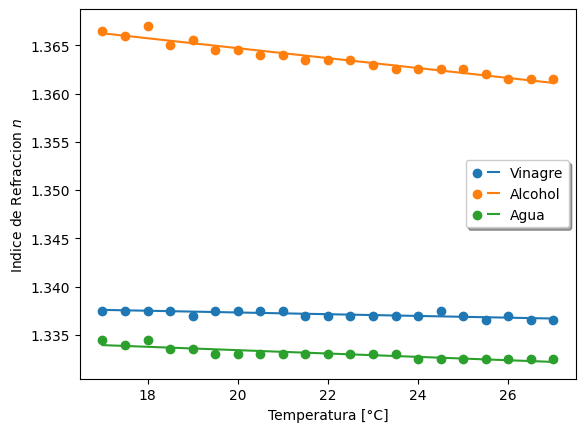

In [8]:
fig1, ax1 = plt.subplots()
ax1.set(
	xlabel='Temperatura [°C]', ylabel='Indice de Refraccion $n$'
)

plots = {}
for material in regresiones.keys():
	plots[material] = (
		ax1.scatter(temperaturas, tabla_indices[material]),
		ax1.plot(temperaturas,regresiones_ecuaciones[material](temperaturas))[0]
		# `plot` returns a list, but we want the handle - thus the comma on the left
	)


ax1.legend(
	plots.values(), plots.keys(), handler_map={tuple: HandlerTuple(ndivide=None)},
	shadow=True, fancybox=True
)
#plt.savefig('Indices_de_refracción.pdf', dpi=300)

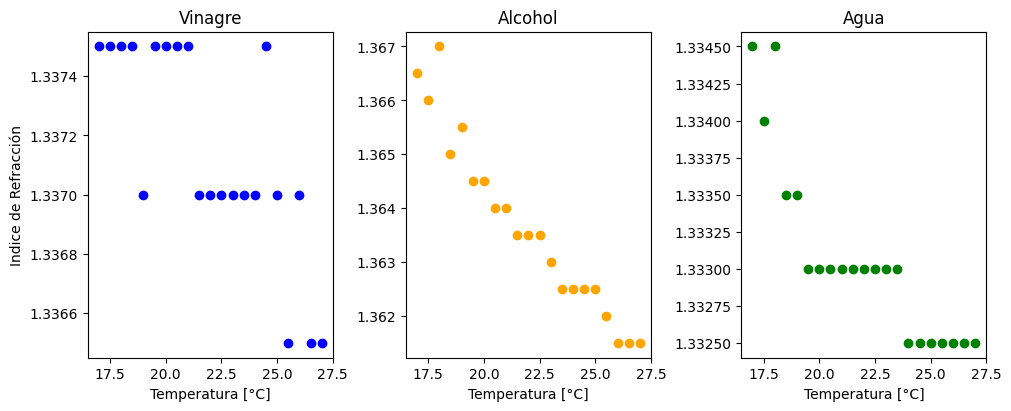

In [9]:
fig2, ax2 = plt.subplots(1, len(regresiones.keys()), layout='constrained', figsize=(10,4))
colors=['blue', 'orange', 'green']

ax2[0].set(ylabel='Indice de Refracción')
for index, material in enumerate(regresiones.keys()):
	ax2[index].set(title=material ,xlabel='Temperatura [°C]')#, ylabel='Indice de Refraccion $n$')

	points = ax2[index].scatter(temperaturas, tabla_indices[material], c=colors[index]),
	#lines = ax2[index].plot(temperaturas,regresiones_ecuaciones[material](temperaturas))[0]

	#ax2[index].legend(
	#	[(points, lines)], [material], handler_map={tuple: HandlerTuple(ndivide=None)},
	#	shadow=True, fancybox=True
	#)

#plt.savefig('Graficas_indice.pdf', dpi=300)